# <a href="https://www.kaggle.com/competitions/titanic/overview">Titanic - Machine Learning from Disaster</a>
<hr>

## O desafio
O naufrágio do Titanic é um dos naufrágios mais infames da história.

Em 15 de abril de 1912, durante sua viagem inaugural, o amplamente considerado “inafundável” RMS Titanic afundou após colidir com um iceberg. Infelizmente, não havia botes salva-vidas suficientes para todos a bordo, resultando na morte de 1.502 dos 2.224 passageiros e tripulantes.

Embora houvesse algum elemento de sorte envolvido na sobrevivência, parece que alguns grupos de pessoas eram mais propensos a sobreviver do que outros.

Neste desafio, pedimos que você construa um modelo preditivo que responda à pergunta: “que tipo de pessoa tem mais probabilidade de sobreviver?” usando dados de passageiros (ou seja, nome, idade, sexo, classe socioeconômica, etc).
<Hr>

## Importando Pacotes

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, plot_confusion_matrix

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb

import warnings
warnings.filterwarnings('ignore')

## Carregando Dados

In [3]:
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
dataset = train

## Pré-Processamento dos Dados

In [6]:
dataset.fillna(-1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,-1,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,-1,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,-1,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,-1,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,-1.0,1,2,W./C. 6607,23.4500,-1,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [7]:
dataset.dropna(inplace=True)

In [8]:
dataset['Sex'] = dataset['Sex'].map({'male':0, 'female':1})
dataset['Embarked'] = dataset['Embarked'].map({'C':0, 'Q':1, 'S':2})

In [9]:
dataset.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked         int64
dtype: object

In [10]:
dataset['Age'], dataset['Embarked'] = dataset['Age'].astype(np.int64), pd.to_numeric(dataset['Embarked'], errors='coerce')

In [11]:
dataset.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex              int64
Age              int64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked         int64
dtype: object

In [12]:
print(dataset['Sex'].value_counts())
print(dataset['Embarked'].value_counts())

0    95
1    88
Name: Sex, dtype: int64
2    116
0     65
1      2
Name: Embarked, dtype: int64


## Separando as Bases

In [13]:
treino = ['Pclass','Sex','Age']

In [14]:
x = dataset[treino]
y = dataset['Survived']

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [15]:
print(f'Quantidade de dados para treino: {x_train.shape[0]}\nQuantidade de dados para teste: {x_test.shape[0]}\nTotal: {x_train.shape[0] + y_test.shape[0]}')
print(f'\nPorcentagem de dados para teste: {len(x_test) / len(x_train) *100:.2f}%')

Quantidade de dados para treino: 137
Quantidade de dados para teste: 46
Total: 183

Porcentagem de dados para teste: 33.58%


## Avaliando Modelos

In [18]:
classificador_xgb_regression = LogisticRegression()
resultado_cv_regression = cross_val_score(classificador_xgb_regression, x_train, y_train)
print(f'\nResultado da avaliação: {resultado_cv_regression}\nAcuracia: {resultado_cv_regression.mean()*100:.2f}')


Resultado da avaliação: [0.82142857 0.75       0.7037037  0.74074074 0.74074074]
Acuracia: 75.13


In [16]:
classificador_xgb = xgb.XGBClassifier(verbosity = 0)
resultado_cv = cross_val_score(classificador_xgb, x_train, y_train)
print(f'\nResultado da avaliação: {resultado_cv}\nAcuracia: {resultado_cv.mean()*100:.2f}')


Resultado da avaliação: [0.85714286 0.89285714 0.7037037  0.88888889 0.81481481]
Acuracia: 83.15


In [17]:
classificador_xgb_tunado = xgb.XGBClassifier(max_depth=2, verbosity = 0)
resultado_cv_xgb = cross_val_score(classificador_xgb_tunado, x_train, y_train)
print(f'\nResultado da avaliação: {resultado_cv_xgb}\nAcuracia: {resultado_cv_xgb.mean()*100:.2f}')


Resultado da avaliação: [0.89285714 0.85714286 0.74074074 0.88888889 0.81481481]
Acuracia: 83.89


In [18]:
classificador_xgb_dart = xgb.XGBClassifier(booster='dart', verbosity = 0)
resultado_cv_dart = cross_val_score(classificador_xgb_dart, x_train, y_train)
print(f'\nResultado da avaliação: {resultado_cv_dart}\nAcuracia: {resultado_cv_dart.mean()*100:.2f}')


Resultado da avaliação: [0.85714286 0.89285714 0.7037037  0.88888889 0.81481481]
Acuracia: 83.15


In [19]:
classificador_xgb_gblinear = xgb.XGBClassifier(booster='gblinear', verbosity = 0)
resultado_cv_gblinear = cross_val_score(classificador_xgb_gblinear, x_train, y_train)
print(f'\nResultado da avaliação: {resultado_cv_gblinear}\nAcuracia: {resultado_cv_gblinear.mean()*100:.2f}')


Resultado da avaliação: [0.78571429 0.64285714 0.74074074 0.77777778 0.7037037 ]
Acuracia: 73.02


In [20]:
classificador_RandomForest = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)
resultado_cv_RandomForest = cross_val_score(classificador_RandomForest, x_train, y_train)
print(f'\nResultado da avaliação: {resultado_cv_RandomForest}\nAcuracia: {resultado_cv_RandomForest.mean()*100:.2f}')


Resultado da avaliação: [0.75       0.78571429 0.7037037  0.88888889 0.85185185]
Acuracia: 79.60


## Modelo

In [21]:
modelo =  xgb.XGBClassifier(max_depth=2, verbosity = 0)

## Treino

In [22]:
modelo.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=2, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=0)

## Teste

In [23]:
predicao = modelo.predict(x_test)

In [24]:
predicao

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0], dtype=int64)

## Avaliação

In [25]:
Report = classification_report(y_test, predicao)
print(f'{Report}\nAcurácia: {accuracy_score(y_test, predicao):.2f}')

              precision    recall  f1-score   support

           0       0.71      0.56      0.63        18
           1       0.75      0.86      0.80        28

    accuracy                           0.74        46
   macro avg       0.73      0.71      0.71        46
weighted avg       0.74      0.74      0.73        46

Acurácia: 0.74


## Matriz de Confusão

Matriz de Confusão:
[[10  8]
 [ 4 24]]


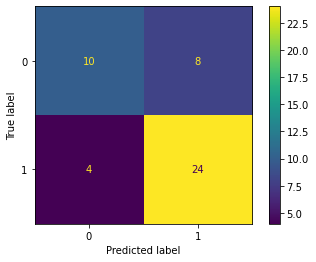

In [26]:
print(f'Matriz de Confusão:\n{confusion_matrix(y_test, predicao)}')

plot_confusion_matrix(modelo, x_test, y_test)  
plt.show()

# Indica que 10 não sobreviveram - Verdade
# Indica que 8 não sobreviveram - mentira
# Indica que 4 sobreviveram - mentira
# Indica que 24 sobreviveram - verdade
# Dica: Os dados existentes nos lados Superior Direito e Inferior Esquerdo são sempre falsos.

## Importância das Features

In [27]:
modelo.feature_importances_
feature_importances = pd.DataFrame(modelo.feature_importances_,
                                   index = x_train.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)
feature_importances

,importance
Sex,0.847693
Age,0.094630
Pclass,0.057677


## Testando com novos dados

In [28]:
test_new = test[['Pclass','Sex','Age']]
test_new

,Pclass,Sex,Age
0,3,male,34.5
1,3,female,47.0
2,2,male,62.0
3,3,male,27.0
4,3,female,22.0
...,...,...,...
413,3,male,NaN
414,1,female,39.0
415,3,male,38.5
416,3,male,NaN


In [29]:
test_new.fillna(-1, inplace=True)

In [30]:
test_new['Sex'] = test_new['Sex'].map({'male':0, 'female':1})
test_new['Age'] = test_new['Age'].astype(np.int64)

In [31]:
test_new

,Pclass,Sex,Age
0,3,0,34
1,3,1,47
2,2,0,62
3,3,0,27
4,3,1,22
...,...,...,...
413,3,0,-1
414,1,1,39
415,3,0,38
416,3,0,-1


In [32]:
nova_predicao = modelo.predict(test_new)

In [41]:
gender_submission = pd.DataFrame(test['PassengerId'])
gender_submission['Survived'] = nova_predicao

In [42]:
gender_submission

,PassengerId,Survived
0,892,1
1,893,1
2,894,0
3,895,1
4,896,1
...,...,...
413,1305,1
414,1306,1
415,1307,0
416,1308,1


In [ ]:
gender_submission.to_csv('./output/gender_submission.csv', sep=',', index=False)